In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/Users/aleksandr/Desktop/datasets/shumilov.csv')

In [7]:
useles_columns = ['№', 'Модель (полное название)', 'Модель процессора', 'Год выпуска процессора', 'Модель встроенной видеокарты', 'Тип (марка) куллера материнской платы', 'Браузер для тестов','Исполнитель']
df = df.drop(labels = useles_columns,axis = 1)

In [8]:
num_features = ['Количество ядер', 'Количество логических процессоров (потоков)', 'Тактовая частота процессора (ГГц)','HDD','SSD' , 'Объем видеопамяти (Гб)', 'Объем видеопамяти (Гб).1']
cat_features = ['Вид графического ускорителя (Дискретный / Встроенный)', 'Тип видеопамяти', 'Размер оперативной памяти (Гб)']

In [9]:
obj_df = df[num_features].copy()
obj_df['Объем видеопамяти (Гб).1'] = pd.to_numeric(obj_df['Объем видеопамяти (Гб).1'], errors='coerce')
obj_df = obj_df.fillna({"Объем видеопамяти (Гб)": 0,
                       "Объем видеопамяти (Гб).1": 0})

In [10]:
df[num_features] = obj_df

In [11]:
def rename_cols(old_name, one_hot):
    new_cols = {}
    for column in one_hot:
        new_cols[column] = old_name + ": " + column
    return one_hot.rename(columns=new_cols)

In [12]:
graph_acc = pd.get_dummies(df['Вид графического ускорителя (Дискретный / Встроенный)'])
graph_acc.columns = graph_acc.columns.str.strip()
graph_acc.loc[graph_acc['дискретный и встроенный'] == 1, ['встроенный', 'дискретный']] = 1
graph_acc = graph_acc.drop('дискретный и встроенный', axis=1)
graph_acc = rename_cols('Вид графического ускорителя', graph_acc)
    

In [13]:
video_mem = pd.get_dummies(df['Тип видеопамяти'])
video_mem = rename_cols('Тип видеопамяти', video_mem)

In [14]:
RAM_size = (df['Размер оперативной памяти (Гб)'] // 8 > 0).astype(int)

In [15]:
def add_cols(df, add_df):
    for column in add_df.columns:
        df[column] = add_df[column]

In [16]:
df = df.drop(cat_features, axis=1)
add_cols(df, graph_acc)
add_cols(df, video_mem)
df['Оперативная память > 8'] = RAM_size

In [17]:
benchmark_columns = ['Учебный', 'Развлекательный', 'Эталон']
benchmark_df = df[benchmark_columns].copy()
benchmark_df = benchmark_df.fillna(0)
benchmark_df['sum'] = benchmark_df[benchmark_columns].sum(axis=1)
df = df.drop(['Учебный', 'Развлекательный', 'Эталон'], axis=1)

In [18]:
df['benchmark'] = benchmark_df['sum']

In [19]:
df = df.drop('Модель дискретной видеокарты', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Количество ядер                              23 non-null     int64  
 1   Количество логических процессоров (потоков)  23 non-null     int64  
 2   Тактовая частота процессора (ГГц)            23 non-null     float64
 3   Максимальная тактовая частота (ГГц)          23 non-null     float64
 4   Объем кэша L2 процессора (Кб)                23 non-null     int64  
 5   Объем кэша L3 процессора (Кб)                23 non-null     int64  
 6   Частота оперативной памяти (МГц)             23 non-null     int64  
 7   HDD                                          23 non-null     int64  
 8   SSD                                          23 non-null     int64  
 9   Объем видеопамяти (Гб)                       23 non-null     float64
 10  Объе

In [21]:
# --- Linear Regression --- 

In [22]:
df.head()

,Количество ядер,Количество логических процессоров (потоков),Тактовая частота процессора (ГГц),Максимальная тактовая частота (ГГц),Объем кэша L2 процессора (Кб),Объем кэша L3 процессора (Кб),Частота оперативной памяти (МГц),HDD,SSD,Объем видеопамяти (Гб),...,Вид графического ускорителя: дискретный,Тип видеопамяти: DDR3,Тип видеопамяти: DDR4,Тип видеопамяти: GDDR3,Тип видеопамяти: GDDR5,Тип видеопамяти: GDDR6,Тип видеопамяти: LPDDR4X,Тип видеопамяти: SMA,Оперативная память > 8,benchmark
0,6,12,3.0,4.0,3072,8192,3200,0,512,4.0,...,1,0,0,0,0,1,0,0,1,0.0
1,2,4,2.2,3.4,512,4096,2133,0,128,0.0,...,0,0,0,0,0,0,0,1,0,7565.0
2,2,4,2.4,2.4,256,3072,1600,232,0,2.0,...,1,1,0,0,0,0,0,0,0,13360.0
3,6,12,2.3,4.2,3072,16384,3200,0,512,0.0,...,0,0,1,0,0,0,0,0,1,0.0
4,4,4,1.1,3.3,1536,4096,3200,0,256,0.0,...,0,0,1,0,0,0,0,0,1,0.0


In [29]:
df.describe()

,Количество ядер,Количество логических процессоров (потоков),Тактовая частота процессора (ГГц),Максимальная тактовая частота (ГГц),Объем кэша L2 процессора (Кб),Объем кэша L3 процессора (Кб),Частота оперативной памяти (МГц),HDD,SSD,Объем видеопамяти (Гб),...,Вид графического ускорителя: дискретный,Тип видеопамяти: DDR3,Тип видеопамяти: DDR4,Тип видеопамяти: GDDR3,Тип видеопамяти: GDDR5,Тип видеопамяти: GDDR6,Тип видеопамяти: LPDDR4X,Тип видеопамяти: SMA,Оперативная память > 8,benchmark
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3.739130,6.956522,2.043478,3.321739,1224.347826,6144.000000,2440.347826,184.000000,320.826087,1.478261,...,0.478261,0.043478,0.521739,0.043478,0.217391,0.043478,0.043478,0.086957,0.782609,6758.173913
std,1.737746,3.807627,0.529859,1.377401,838.309913,4176.660345,589.856578,465.888008,217.405497,2.107768,...,0.510754,0.208514,0.510754,0.208514,0.421741,0.208514,0.208514,0.288104,0.421741,5137.050300
min,2.000000,2.000000,1.000000,1.200000,256.000000,0.000000,1333.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.650000,2.450000,512.000000,3584.000000,2133.000000,0.000000,239.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,8.000000,2.200000,3.300000,1024.000000,4096.000000,2400.000000,0.000000,256.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7695.000000
75%,4.000000,8.000000,2.400000,3.850000,1792.000000,8192.000000,2667.000000,0.000000,512.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10758.000000
max,8.000000,16.000000,3.000000,8.400000,3072.000000,16384.000000,3733.000000,2000.000000,954.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15218.000000


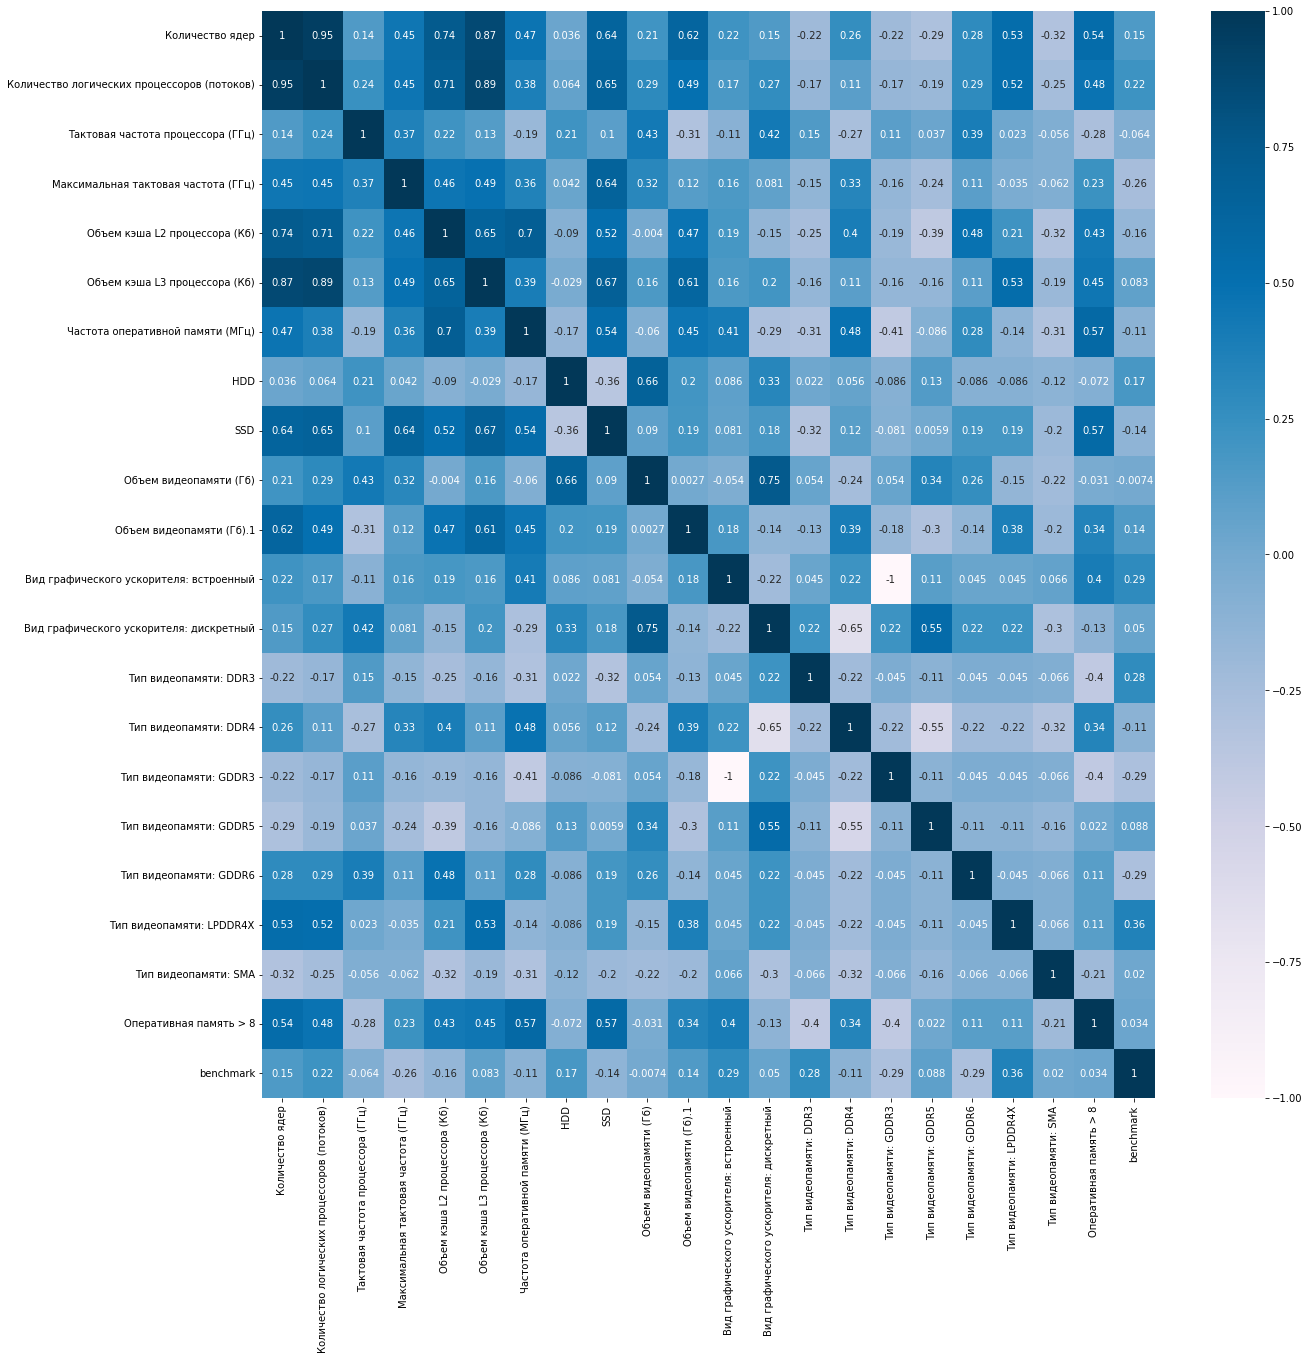

In [33]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(df.corr(), annot=True,cmap =plt.cm.PuBu)

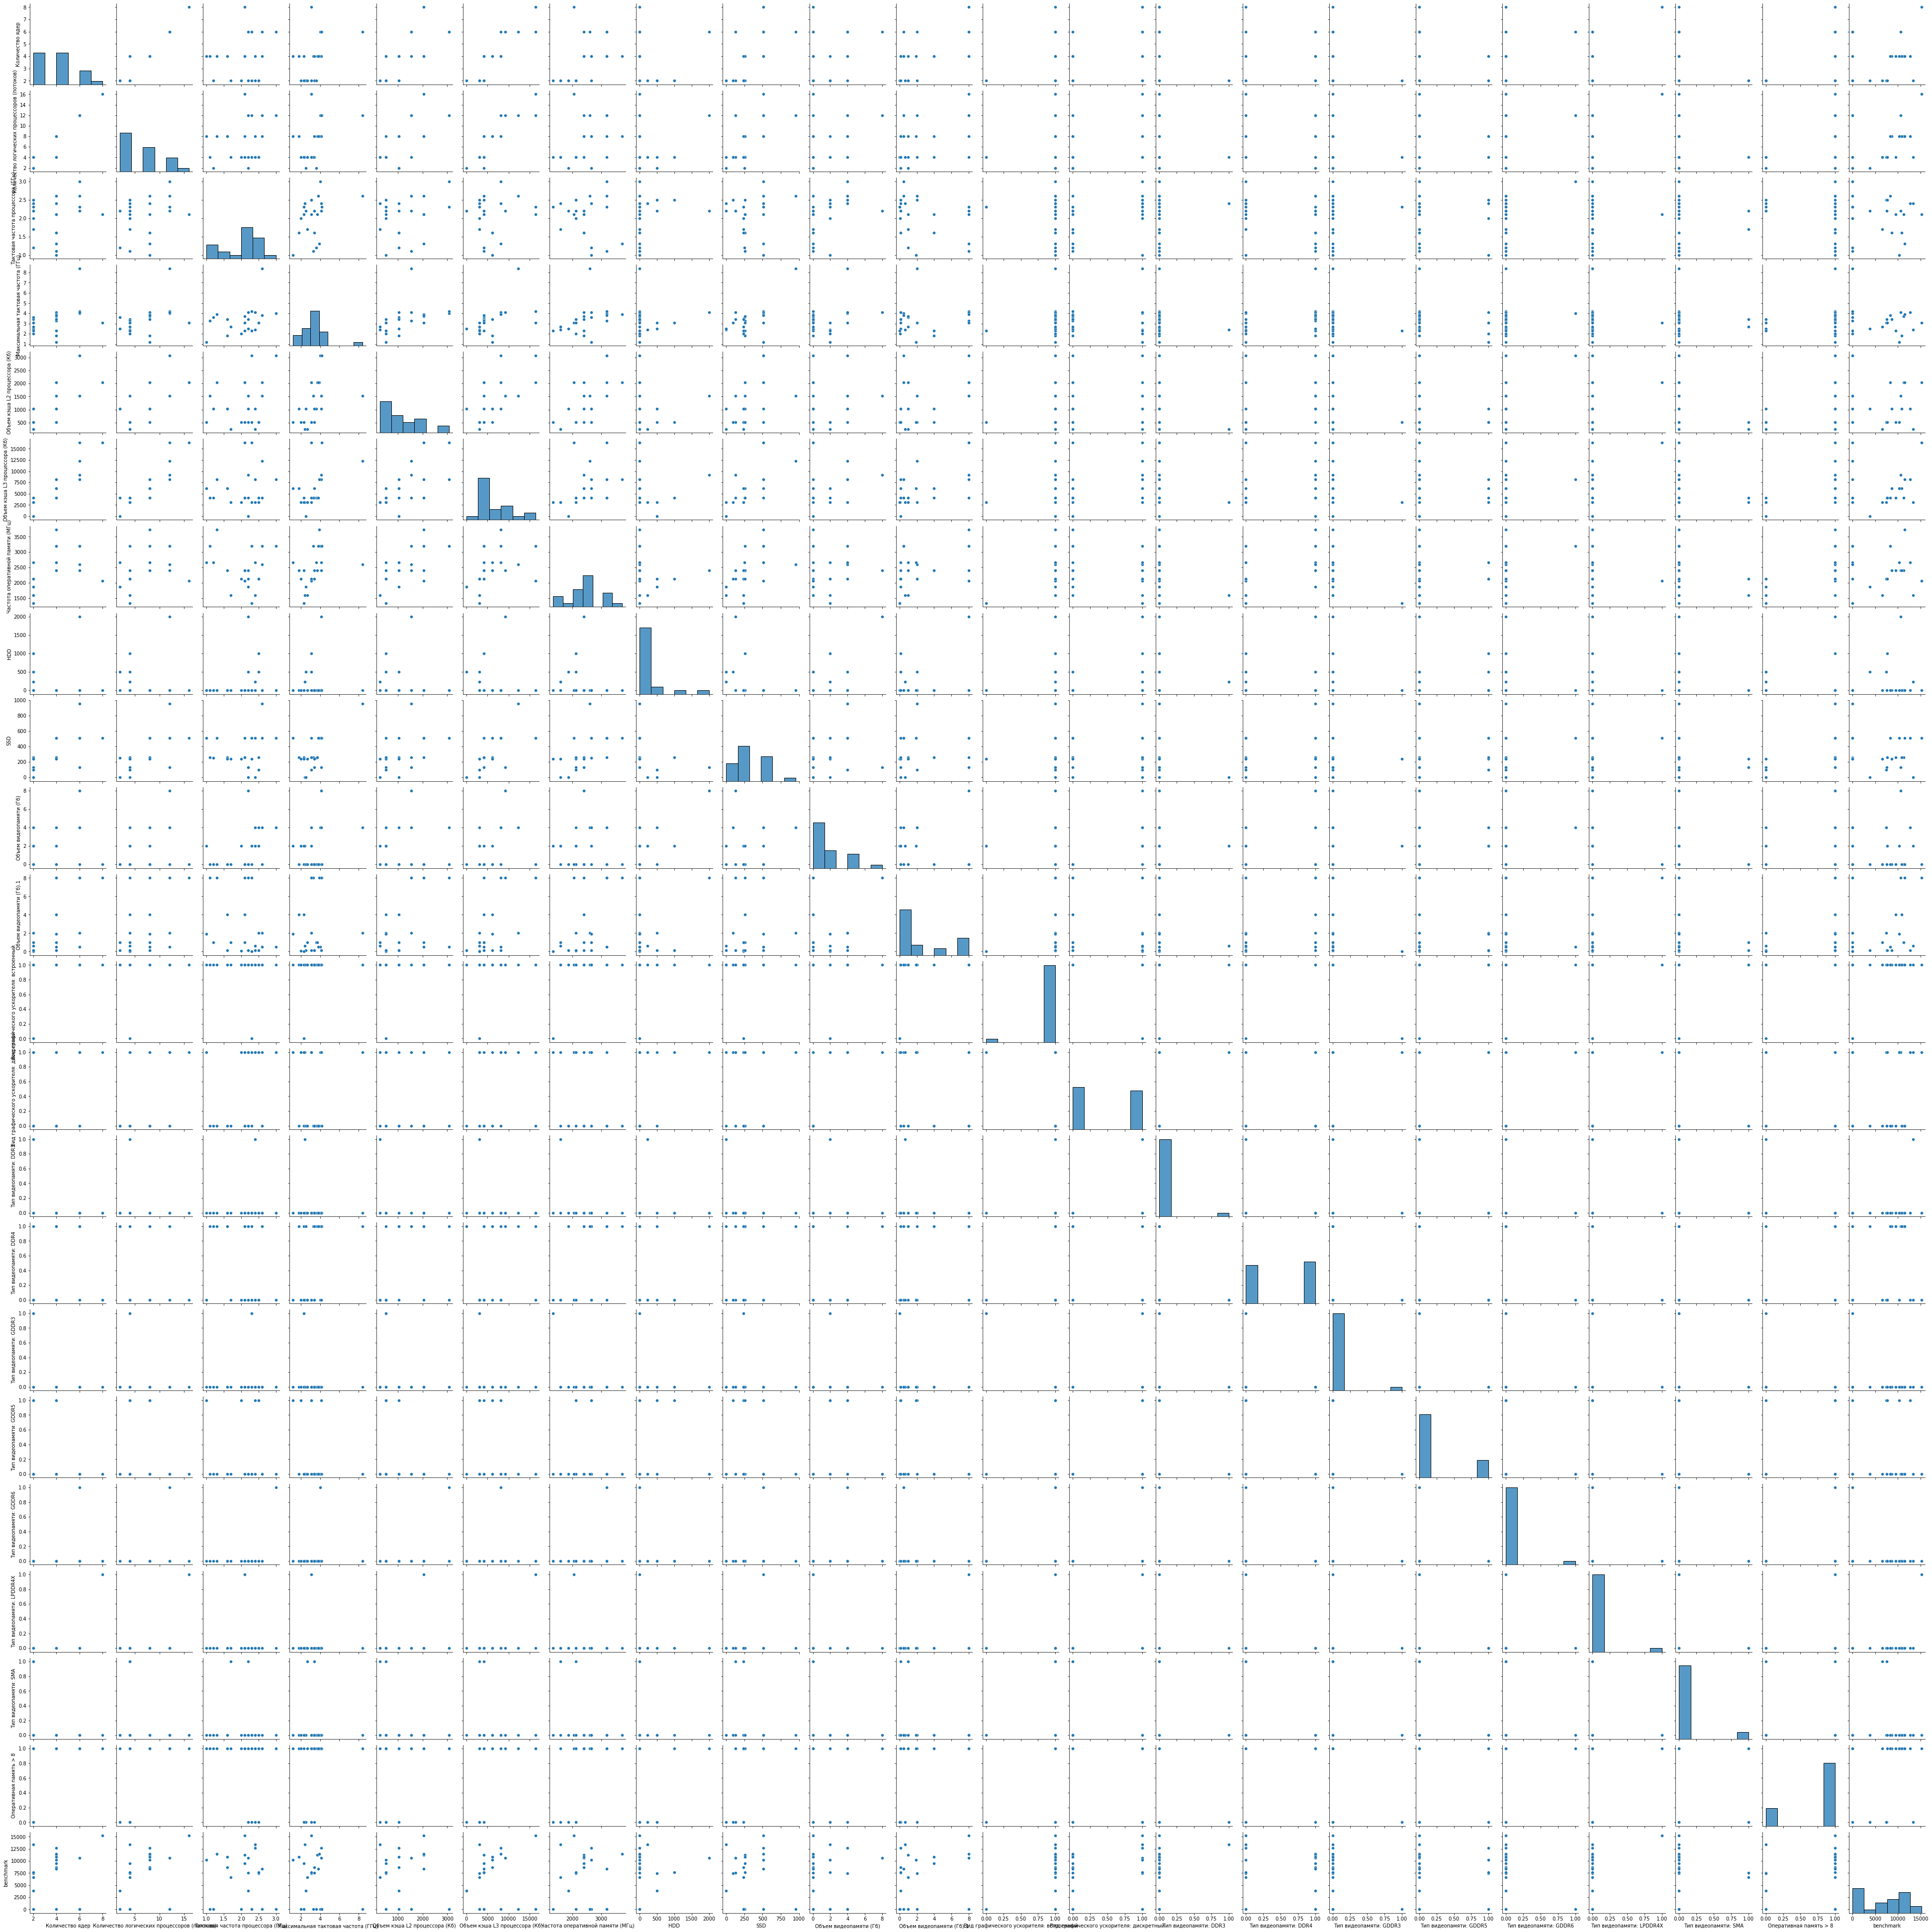

In [39]:
sns.pairplot(df, kind='scatter')
plt.xticks(rotation=90)
plt.show()

In [40]:
numeric_columns=df._get_numeric_data().columns

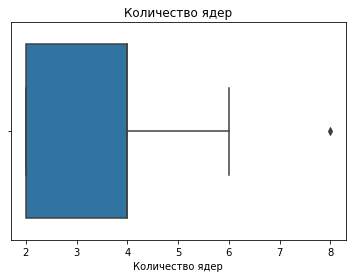

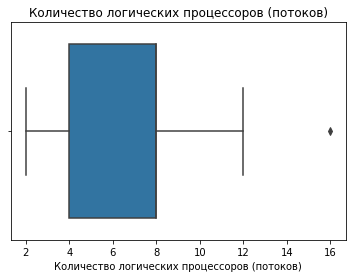

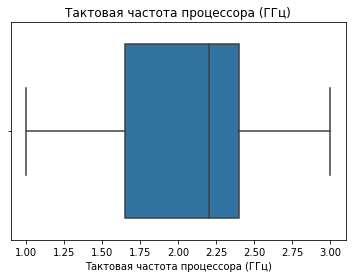

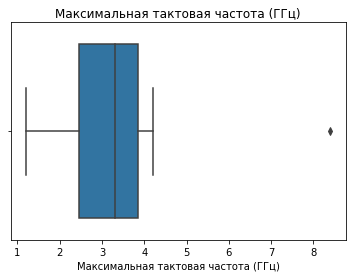

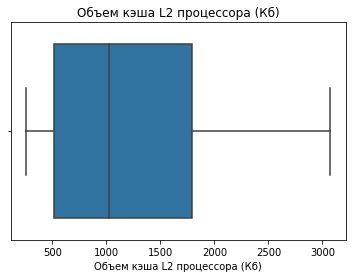

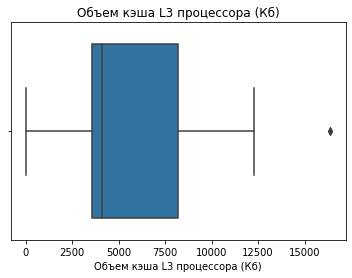

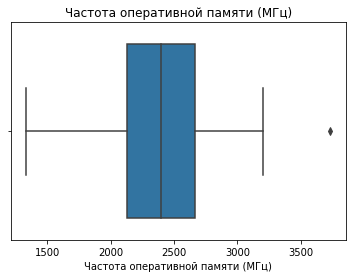

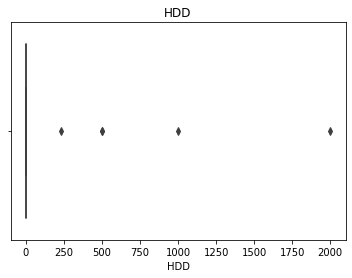

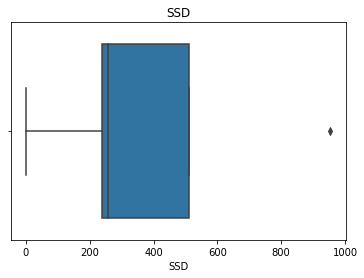

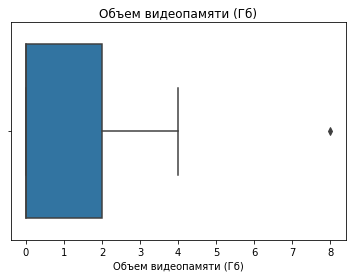

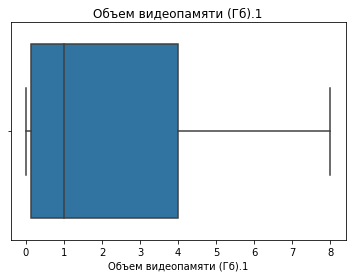

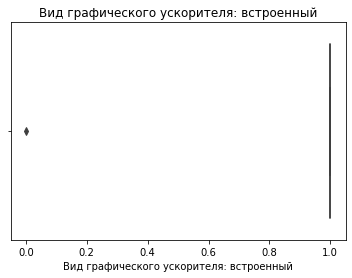

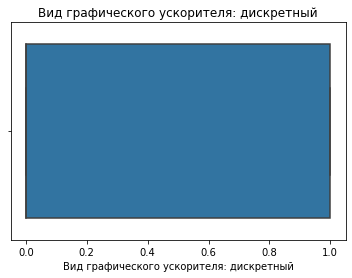

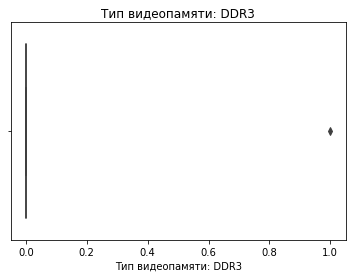

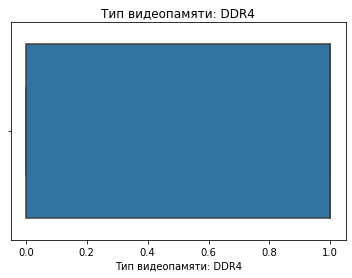

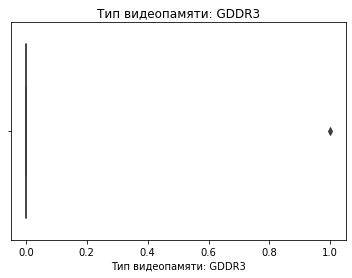

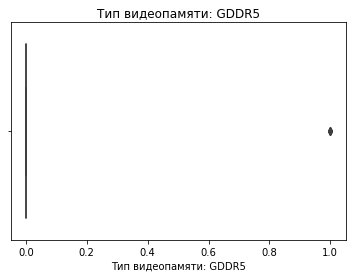

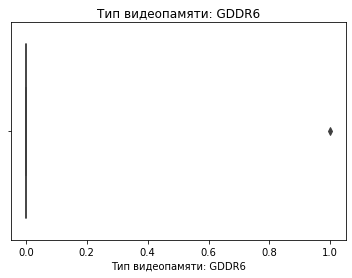

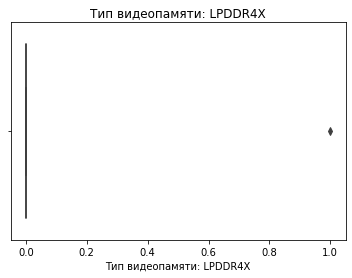

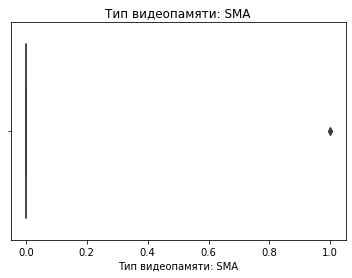

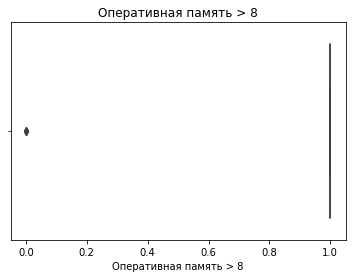

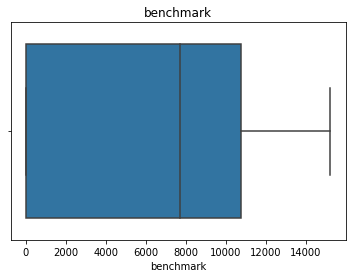

In [42]:
import warnings
warnings.filterwarnings('ignore')

for col in numeric_columns:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()